In [1]:
#Paso 1. conectarse con google colab
from google.colab import drive
drive.mount('/content/drive')
#!/usr/bin/env python

Mounted at /content/drive


In [9]:
#Importación de librerias
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator

In [3]:
TRAIN_PATH = '/content/drive/MyDrive/DATASET/train'
SIZE = (240, 240)

In [4]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['rottenoranges', 'freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana']


In [5]:
TEST_PATH = '/content/drive/MyDrive/DATASET/test'

In [7]:
#Importar modelo
#checkpoint_path = "training_1/cp.ckpt"
model = tf.keras.models.load_model('/content/drive/MyDrive/model_v3.h5')

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)

Found 2698 images belonging to 6 classes.
2698/2698 [==============================] - 134s 50ms/step - loss: 1.0094 - accuracy: 0.9522
accuracy test:  0.9521868228912354


<ipython-input-11-f7e32a7ab68e>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


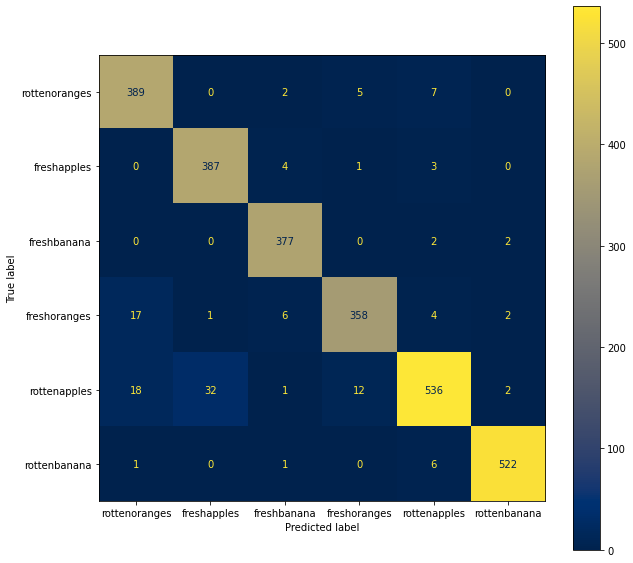

In [11]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# predecir
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_generator.classes, predicted_classes)
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="cividis")